In [1]:
#import depenedencies
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import keras
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Dropout,Flatten, Activation
from keras.layers import BatchNormalization, Reshape, Conv2DTranspose, UpSampling2D
from keras.optimizers import RMSprop
%matplotlib inline

Goal: build GAN to draw pictures of apples

In [25]:
#load data
input_images = r'C:\Users\brend\Desktop\GitHub\QuickDraw_Data\bitmap_apple.npy'
data = np.load(input_images)

In [9]:
data.shape

(152159, 784)

In [26]:
data = data/255
data = np.reshape(data, (data.shape[0], 28, 28, 1))
img_w, img_h = data.shape[1:3]

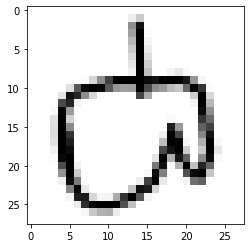

In [27]:
#show image as example
plt.imshow(data[4242,:,:,0], cmap='Greys')

Build Discriminator

In [12]:
#discriminator model architecture
def build_discriminator(depth=64, p=0.4):
    
    #Define inputs
    image = Input((img_w, img_h, 1))
    
    #Convolutional layers
    conv1 = Conv2D(depth*1, 5, strides=2,
                   padding='same', activation='relu')(image)
    conv1 = Dropout(p)(conv1)

    conv2 = Conv2D(depth*2, 5, strides=2,
                   padding='same', activation='relu')(conv1)
    conv2 = Dropout(p)(conv2)

    conv3 = Conv2D(depth*4, 5, strides=2,
                   padding='same', activation='relu')(conv2)
    conv3 = Dropout(p)(conv3)

    conv4 = Conv2D(depth*8, 5, strides=2,
                   padding='same', activation='relu')(conv3)
    conv4 = Flatten()(Dropout(p)(conv4))
    
    #output layer
    prediction = Dense(1, activation='sigmoid')(conv4)
    
    #Model definition
    model = Model(inputs=image, outputs=prediction)
    
    return model

In [13]:
#build discriminator
discriminator = build_discriminator()

In [15]:
discriminator.compile(loss='binary_crossentropy',
                      optimizer=RMSprop(learning_rate=0.0008,
                                        decay=6e-8,
                                        clipvalue=1.0),
                      metrics=['accuracy'])

Generator model architecture

In [16]:
#generator model architecture 
z_dimensions = 32
def build_generator(latent_dim=z_dimensions,
                    depth=64, p=0.4):
    #define inputs
    noise = Input((latent_dim,))
    
    #First dense layer
    dense1 = Dense(7*7*depth)(noise)
    dense1 = BatchNormalization(momentum=0.9)(dense1)
    dense1 = Activation(activation='relu')(dense1)
    dense1 = Reshape((7,7,depth))(dense1)
    dense1 = Dropout(p)(dense1)
    
    #De-convolutional layers
    conv1 = UpSampling2D()(dense1)
    conv1 = Conv2DTranspose(int(depth/2),
                            kernel_size=5, padding='same',
                            activation=None,)(conv1)
    conv1 = BatchNormalization(momentum=0.9)(conv1)
    conv1 = Activation(activation='relu')(conv1)


    conv2 = UpSampling2D()(conv1)
    conv2 = Conv2DTranspose(int(depth/4),
                            kernel_size=5, padding='same',
                            activation=None,)(conv2)
    conv2 = BatchNormalization(momentum=0.9)(conv2)
    conv2 = Activation(activation='relu')(conv2)

    conv3 = Conv2DTranspose(int(depth/8),
                            kernel_size=5, padding='same',
                            activation=None,)(conv2)
    conv3 = BatchNormalization(momentum=0.9)(conv3)
    conv3 = Activation(activation='relu')(conv3)
    
    #output layer
    image = Conv2D(1, kernel_size=5, padding='same',
                   activation='sigmoid')(conv3)
    
    #Model definition
    model = Model(inputs=noise, outputs=image)
    
    return model

In [17]:
#create generator
generator = build_generator()

Adversarial model architecture

In [28]:
#Adversarial model architecture
z = Input(shape=(z_dimensions,))
img = generator(z)
discriminator.trainable = False
pred = discriminator(img)
adversarial_model = Model(z, pred)

In [29]:
adversarial_model.compile(loss='binary_crossentropy',
                          optimizer=RMSprop(learning_rate=0.004,
                                            decay=3e-8,
                                            clipvalue=1.0),
                          metrics=['accuracy'])

Gan Training

4/4 [==============================] - 0s 33ms/step
Epoch #99
99: [D loss: 0.084083, acc: 0.983823] [A loss: 4.796700, acc: 0.014205]
1/1 [==============================] - 0s 29ms/step


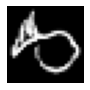

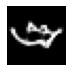

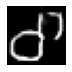

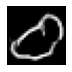

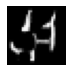

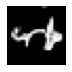

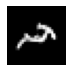

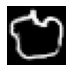

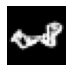

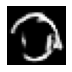

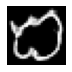

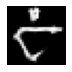

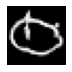

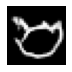

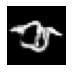

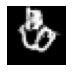

4/4 [==============================] - 0s 30ms/step
Epoch #199
199: [D loss: 0.135314, acc: 0.957012] [A loss: 4.328294, acc: 0.025283]
1/1 [==============================] - 0s 31ms/step


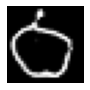

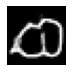

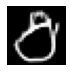

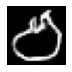

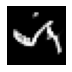

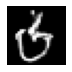

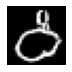

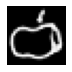

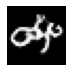

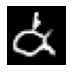

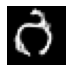

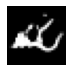

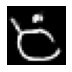

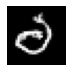

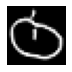

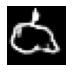

4/4 [==============================] - 0s 33ms/step
Epoch #299
299: [D loss: 0.197327, acc: 0.926252] [A loss: 3.880264, acc: 0.044759]
1/1 [==============================] - 0s 30ms/step


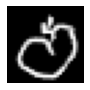

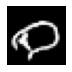

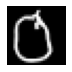

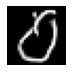

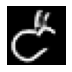

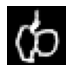

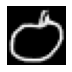

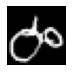

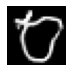

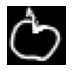

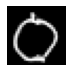

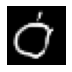

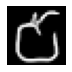

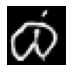

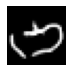

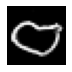

4/4 [==============================] - 0s 34ms/step
Epoch #399
399: [D loss: 0.249392, acc: 0.899877] [A loss: 3.546675, acc: 0.062383]
1/1 [==============================] - 0s 35ms/step


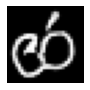

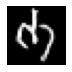

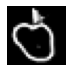

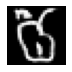

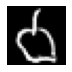

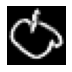

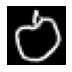

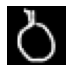

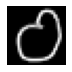

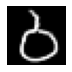

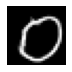

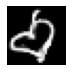

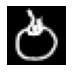

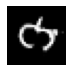

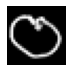

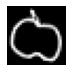

4/4 [==============================] - 0s 32ms/step
Epoch #499
499: [D loss: 0.282056, acc: 0.882460] [A loss: 3.316091, acc: 0.075088]
1/1 [==============================] - 0s 32ms/step


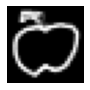

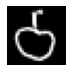

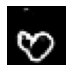

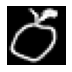

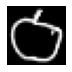

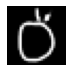

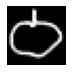

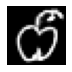

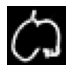

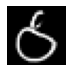

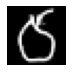

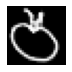

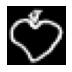

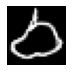

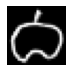

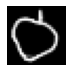

4/4 [==============================] - 0s 30ms/step
Epoch #599
599: [D loss: 0.307469, acc: 0.868544] [A loss: 3.139811, acc: 0.083903]
1/1 [==============================] - 0s 47ms/step


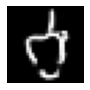

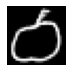

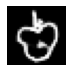

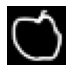

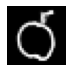

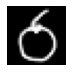

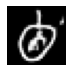

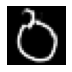

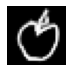

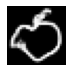

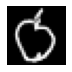

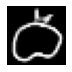

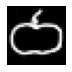

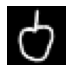

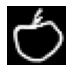

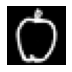

4/4 [==============================] - 0s 21ms/step
Epoch #699
699: [D loss: 0.325005, acc: 0.859319] [A loss: 3.014401, acc: 0.089816]
1/1 [==============================] - 0s 23ms/step


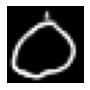

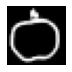

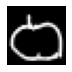

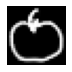

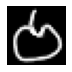

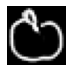

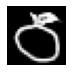

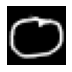

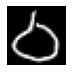

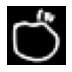

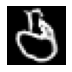

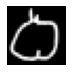

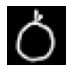

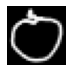

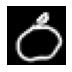

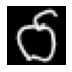

4/4 [==============================] - 0s 26ms/step
Epoch #799
799: [D loss: 0.335611, acc: 0.853709] [A loss: 2.951118, acc: 0.094317]
1/1 [==============================] - 0s 31ms/step


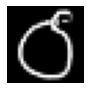

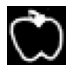

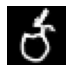

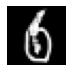

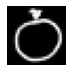

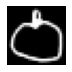

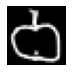

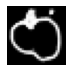

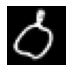

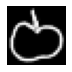

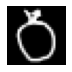

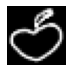

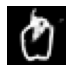

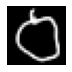

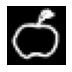

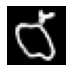

4/4 [==============================] - 0s 22ms/step
Epoch #899
899: [D loss: 0.342571, acc: 0.850220] [A loss: 2.908337, acc: 0.097322]
1/1 [==============================] - 0s 22ms/step


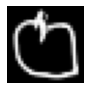

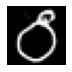

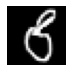

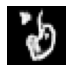

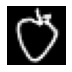

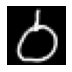

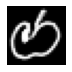

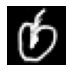

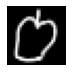

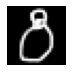

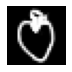

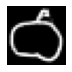

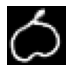

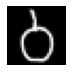

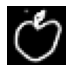

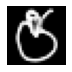

4/4 [==============================] - 0s 27ms/step
Epoch #999
999: [D loss: 0.346116, acc: 0.848282] [A loss: 2.879926, acc: 0.097950]
1/1 [==============================] - 0s 22ms/step


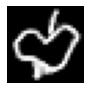

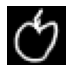

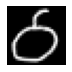

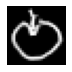

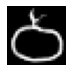

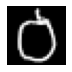

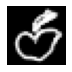

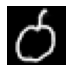

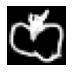

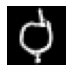

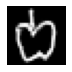

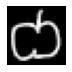

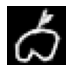

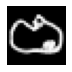

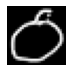

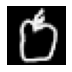

4/4 [==============================] - 0s 22ms/step
Epoch #1099
1099: [D loss: 0.347337, acc: 0.847816] [A loss: 2.882620, acc: 0.097354]
1/1 [==============================] - 0s 24ms/step


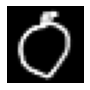

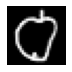

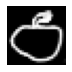

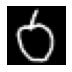

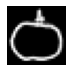

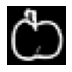

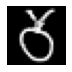

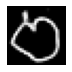

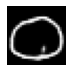

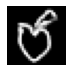

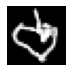

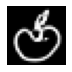

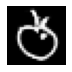

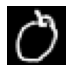

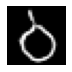

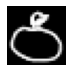

4/4 [==============================] - 0s 22ms/step
Epoch #1199
1199: [D loss: 0.346174, acc: 0.848432] [A loss: 2.907830, acc: 0.096982]
1/1 [==============================] - 0s 28ms/step


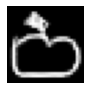

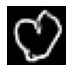

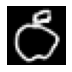

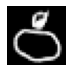

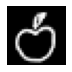

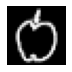

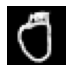

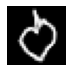

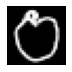

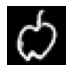

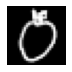

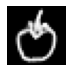

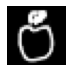

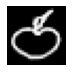

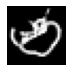

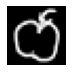

4/4 [==============================] - 0s 21ms/step
Epoch #1299
1299: [D loss: 0.342703, acc: 0.850230] [A loss: 2.950246, acc: 0.094947]
1/1 [==============================] - 0s 16ms/step


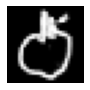

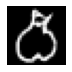

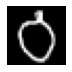

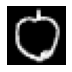

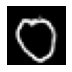

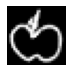

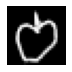

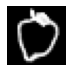

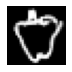

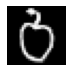

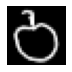

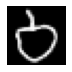

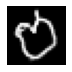

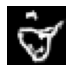

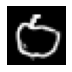

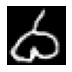

4/4 [==============================] - 0s 17ms/step
Epoch #1399
1399: [D loss: 0.338355, acc: 0.852637] [A loss: 2.998170, acc: 0.092304]
1/1 [==============================] - 0s 16ms/step


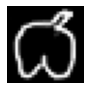

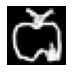

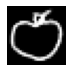

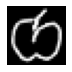

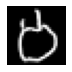

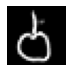

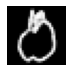

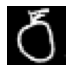

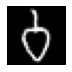

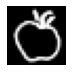

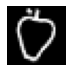

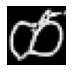

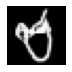

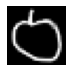

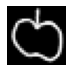

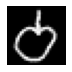

4/4 [==============================] - 0s 17ms/step
Epoch #1499
1499: [D loss: 0.334579, acc: 0.854484] [A loss: 3.041885, acc: 0.090378]
1/1 [==============================] - 0s 20ms/step


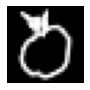

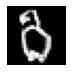

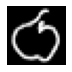

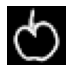

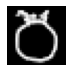

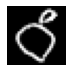

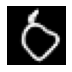

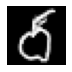

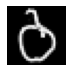

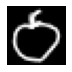

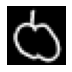

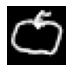

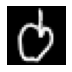

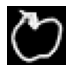

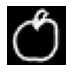

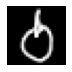

4/4 [==============================] - 0s 21ms/step
Epoch #1599
1599: [D loss: 0.331017, acc: 0.856356] [A loss: 3.075474, acc: 0.087985]
1/1 [==============================] - 0s 16ms/step


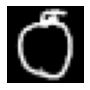

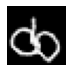

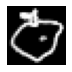

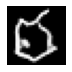

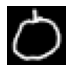

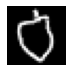

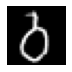

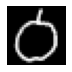

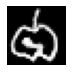

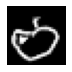

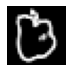

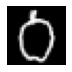

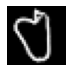

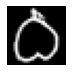

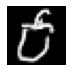

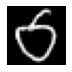

4/4 [==============================] - 0s 16ms/step
Epoch #1699
1699: [D loss: 0.326482, acc: 0.858575] [A loss: 3.122257, acc: 0.085772]
1/1 [==============================] - 0s 16ms/step


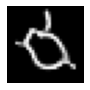

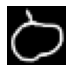

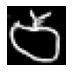

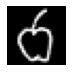

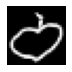

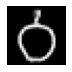

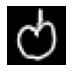

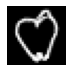

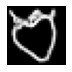

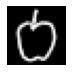

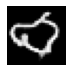

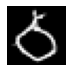

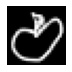

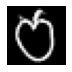

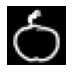

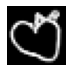

4/4 [==============================] - 0s 17ms/step
Epoch #1799
1799: [D loss: 0.322361, acc: 0.860634] [A loss: 3.169359, acc: 0.083645]
1/1 [==============================] - 0s 12ms/step


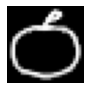

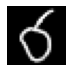

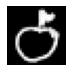

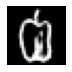

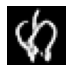

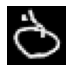

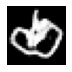

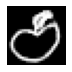

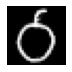

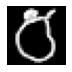

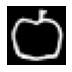

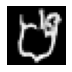

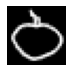

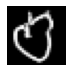

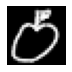

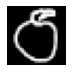

4/4 [==============================] - 0s 12ms/step
Epoch #1899
1899: [D loss: 0.318630, acc: 0.862522] [A loss: 3.218043, acc: 0.081926]
1/1 [==============================] - 0s 16ms/step


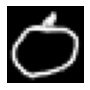

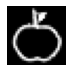

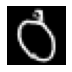

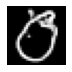

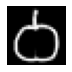

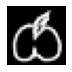

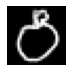

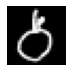

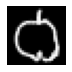

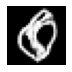

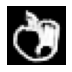

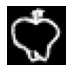

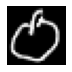

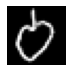

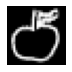

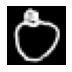

4/4 [==============================] - 0s 21ms/step
Epoch #1999
1999: [D loss: 0.314588, acc: 0.864448] [A loss: 3.270866, acc: 0.080337]
1/1 [==============================] - 0s 20ms/step


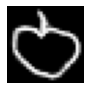

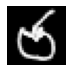

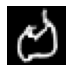

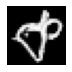

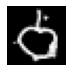

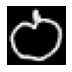

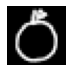

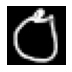

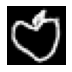

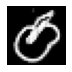

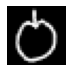

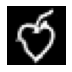

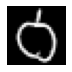

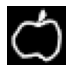

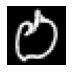

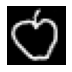

In [30]:
#GAN training
def train(epochs=2000, batch=128, z_dim=z_dimensions):
    
    d_metrics = []
    a_metrics = []
    
    running_d_loss = 0
    running_d_acc = 0
    running_a_loss = 0
    running_a_acc = 0
    
    for i in range(epochs):
        
        #sample real images
        real_imgs = np.reshape(
            data[np.random.choice(data.shape[0],
                                  batch,
                                  replace=False)],
            (batch,28,28,1)
        )
        
        #generate fake images:
        fake_imgs = generator.predict(
            np.random.uniform(-1.0, 1.0,
                              size=[batch,z_dim])
        )
        
        #concatenate images as discriminator inputs:
        x = np.concatenate((real_imgs,fake_imgs))
        
        #assign y labels for discriminator
        y = np.ones([2*batch,1])
        y[batch:,:] = 0
        
        #train discriminator:
        d_metrics.append(
            discriminator.train_on_batch(x,y)
        )
        running_d_loss += d_metrics[-1][0]
        running_d_acc += d_metrics[-1][1]
        
        #adversarial net's noise input and "real" y:
        noise = np.random.uniform(-1.0, 1.0,
                                  size=[batch, z_dim])
        y = np.ones([batch, 1])
        
        #train adversarial net:
        a_metrics.append(
            adversarial_model.train_on_batch(noise, y)
        )
        running_a_loss += a_metrics[-1][0]
        running_a_acc += a_metrics[-1][1]
        
        #periodically print progress & fake images:
        if(i+1)%100 == 0:
            print('Epoch #{}'.format(i))
            log_mesg = "%d: [D loss: %f, acc: %f]" % \
                       (i, running_d_loss / i , running_d_acc / i)
            log_mesg = "%s [A loss: %f, acc: %f]" % \
                       (log_mesg, running_a_loss / i, running_a_acc / i)
            print(log_mesg)
            
            noise = np.random.uniform(-1.0, 1.0,
                                      size=[16, z_dim])
            gen_imgs = generator.predict(noise)
            
            plt.figure(figsize=(5,5))
            
            for k in range(gen_imgs.shape[0]):
                plt.subplot(4,4,k+1)
                plt.imshow(gen_imgs[k,:,:,0],
                           cmap='gray')
                plt.axis('off')
                
                plt.tight_layout()
                plt.show()
    
    return a_metrics, d_metrics

#train the GAN
a_metrics_complete, d_metrics_complete = train()

Text(0, 0.5, 'Loss')

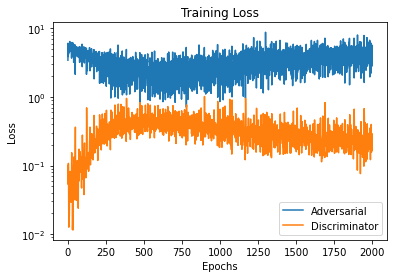

In [31]:
#plotting our GAN training loss
ax = pd.DataFrame(
    {
        'Adversarial': [metric[0] for metric in a_metrics_complete],
        'Discriminator': [metric[0] for metric in d_metrics_complete],
    }
).plot(title='Training Loss', logy=True)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

Text(0, 0.5, 'Accuracy')

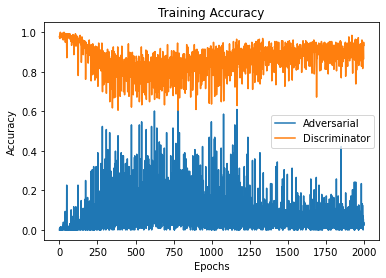

In [32]:
#plotting our GAN training accuracy
ax = pd.DataFrame(
    {
        'Adversarial': [metric[1] for metric in a_metrics_complete],
        'Discriminator': [metric[1] for metric in d_metrics_complete],
    }
).plot(title='Training Accuracy')
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")